In [1]:
# # Google Drive 접근
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# cd /content/drive/MyDrive/ColabNotebooks/Git_Commit/Study

In [3]:
# # 본인임을 확인
# !git config --global user.email 'hun0520@gmail.com'
# !git config --global user.name 'Patrick'

In [4]:
# # 파일 add
# !git add 2장_텍스트_분류.ipynb

In [5]:
# # commit
# !git commit -m '2장 업데이트'
# !git push

1.5 트랜스포머 애플리케이션 둘러보기

In [6]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure \
from your online store in Germany. Unfortunately, when I opened the package, \
I discovered to my horror that I had been sent an action figure of Megatron \
instead! As a lifelong enemy of the Decepticons, I hope you can understand my \
dilemma. To resolve the issue, I demand an exchange of Megatron for the \
Optimus Prime figure I ordered. Enclosed are copies of my records concerning \
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

In [7]:
# 1.5.1 텍스트 분류

from transformers import pipeline

classifier = pipeline('text-classification')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that aut

In [8]:
import pandas as pd

outputs = classifier(text)
pd.DataFrame(outputs)

,label,score
0,NEGATIVE,0.901545


In [9]:
# 1.5.2 개체명 인식

ner_tagger = pipeline('ner', aggregation_strategy='simple')
outputs = ner_tagger(text)
pd.DataFrame(outputs)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTrainin

,entity_group,score,word,start,end
0,ORG,0.879010,Amazon,5,11
1,MISC,0.990859,Optimus Prime,36,49
2,LOC,0.999755,Germany,90,97
3,MISC,0.556568,Mega,208,212
4,PER,0.590259,##tron,212,216
5,ORG,0.669693,Decept,253,259
6,MISC,0.498349,##icons,259,264
7,MISC,0.775361,Megatron,350,358
8,MISC,0.987854,Optimus Prime,367,380
9,PER,0.812096,Bumblebee,502,511


In [10]:
# 1.5.3 질문 답변

reader = pipeline('question-answering')
question = 'what does the customer want'
outputs = reader(question=question, context=text)
pd.DataFrame([outputs])

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


,score,start,end,answer
0,0.567285,335,358,an exchange of Megatron


In [11]:
# 1.5.4 요약

summarizer = pipeline('summarization')
outputs = summarizer(text, max_length=45, clean_up_tokenization_spaces=True)
print(outputs[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Your min_length=56 must be inferior than your max_length=45.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1192: UserWarning: Unfeasible length constraints: `min_length` (56) is larger than the maximum possible length (45). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(


 Bumblebee ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead.


In [12]:
# 1.5.5 번역

translator = pipeline("translation_en_to_de",
                      model="Helsinki-NLP/opus-mt-en-de")
outputs = translator(text, clean_up_tokenization_spaces=True, min_length=100)
print(outputs[0]['translation_text'])

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Sehr geehrter Amazon, letzte Woche habe ich eine Optimus Prime Action Figur aus Ihrem Online-Shop in Deutschland bestellt. Leider, als ich das Paket öffnete, entdeckte ich zu meinem Entsetzen, dass ich stattdessen eine Action Figur von Megatron geschickt worden war! Als lebenslanger Feind der Decepticons, Ich hoffe, Sie können mein Dilemma verstehen. Um das Problem zu lösen, Ich fordere einen Austausch von Megatron für die Optimus Prime Figur habe ich bestellt. Eingeschlossen sind Kopien meiner Aufzeichnungen über diesen Kauf. Ich erwarte, von Ihnen bald zu hören. Aufrichtig, Bumblebee.


In [13]:
outputs

[{'translation_text': 'Sehr geehrter Amazon, letzte Woche habe ich eine Optimus Prime Action Figur aus Ihrem Online-Shop in Deutschland bestellt. Leider, als ich das Paket öffnete, entdeckte ich zu meinem Entsetzen, dass ich stattdessen eine Action Figur von Megatron geschickt worden war! Als lebenslanger Feind der Decepticons, Ich hoffe, Sie können mein Dilemma verstehen. Um das Problem zu lösen, Ich fordere einen Austausch von Megatron für die Optimus Prime Figur habe ich bestellt. Eingeschlossen sind Kopien meiner Aufzeichnungen über diesen Kauf. Ich erwarte, von Ihnen bald zu hören. Aufrichtig, Bumblebee.'}]

In [14]:
# 1.5.6 텍스트 생성
generator = pipeline('text-generation')
response = 'Dear Bumblee, Iam sorry to hear that your oders was mixed up'
prompt = text + '\n\nCustomer service respnse:\n' + response
outputs = generator(prompt, max_length=200)
print(outputs[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 6c0e608 (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Dear Amazon, last week I ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead! As a lifelong enemy of the Decepticons, I hope you can understand my dilemma. To resolve the issue, I demand an exchange of Megatron for the Optimus Prime figure I ordered. Enclosed are copies of my records concerning this purchase. I expect to hear from you soon. Sincerely, Bumblebee.

Customer service respnse:
Dear Bumblee, Iam sorry to hear that your oders was mixed up this week (I am going to post this below). I made an exception by purchasing your item and it was still shipped back on a free return policy. In addition to this, I sent you a note in which you confirmed my satisfaction and that there is no cancellation. My review received an A and B from you and I


2.1 데이터셋

In [15]:
# 2.1.1 허깅테이스 데이터셋 처음 사용하기

from huggingface_hub import list_datasets

all_datasets = [ds.id for ds in list_datasets()]
print(f'현재 허브에는 {len(all_datasets)}개의 데이터셋이 있습니다.')
print(f'처음 10개 데이터셋: {all_datasets[:10]}')

현재 허브에는 165641개의 데이터셋이 있습니다.
처음 10개 데이터셋: ['amirveyseh/acronym_identification', 'ade-benchmark-corpus/ade_corpus_v2', 'UCLNLP/adversarial_qa', 'Yale-LILY/aeslc', 'nwu-ctext/afrikaans_ner_corpus', 'fancyzhx/ag_news', 'allenai/ai2_arc', 'google/air_dialogue', 'komari6/ajgt_twitter_ar', 'legacy-datasets/allegro_reviews']


In [16]:
!pip install datasets

In [17]:
from datasets import load_dataset

emotions = load_dataset("emotion")
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [18]:
train_ds = emotions['train']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [19]:
len(train_ds)

16000

In [20]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [21]:
train_ds.column_names

['text', 'label']

In [22]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [23]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [24]:
# 2.1.2 데이터셋에서 데이터프레임으로

import pandas as pd
emotions.set_format(type='pandas')
df = emotions['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [25]:
# 정수 label을 클래스 이름으로 변경

def label_int2str(row):
  return emotions['train'].features['label'].int2str(row)

df['label_name'] = df['label'].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [26]:
df['label_name'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

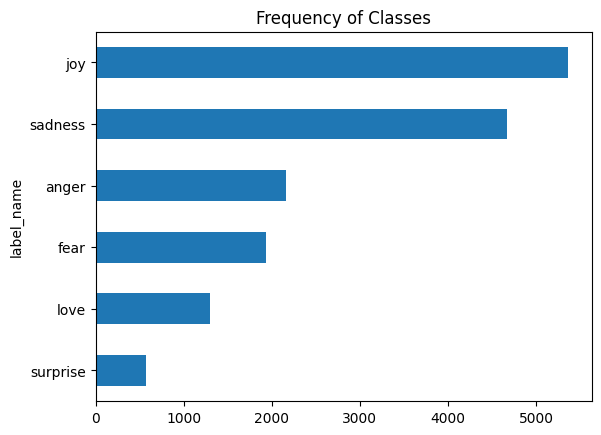

In [27]:
# 2.1.3 클래스 분포 살펴보기

import matplotlib.pyplot as plt

df['label_name'].value_counts(ascending=True).plot.barh()
plt.title('Frequency of Classes')
plt.show()

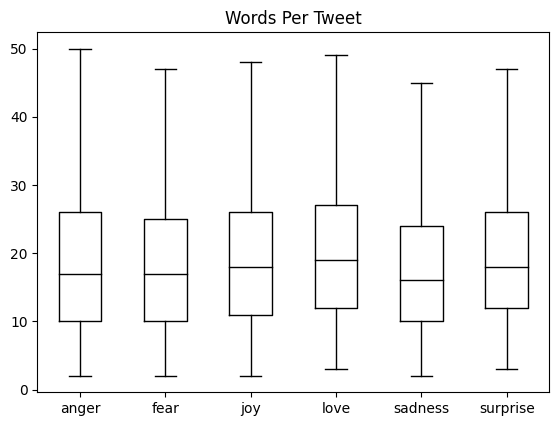

In [28]:
# 2.1.4 트윗 길이 확인

df['Words Per Tweet'] = df['text'].str.split().apply(len)
df.boxplot('Words Per Tweet', by='label_name', grid=False,
           showfliers=False, color='black')
plt.suptitle('')
plt.xlabel('')
plt.show()

In [29]:
emotions.reset_format()

In [30]:
# 2.2.1 문자 토큰화

text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [31]:
# 토큰을 교유한 정수로 인코딩

token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [32]:
# 토큰화된 텍스트를 정수 리스트로 변환

input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [33]:


categorical_df = pd.DataFrame(
    {"Name": ["Bumblebee", "Optimus Prime", "Megatron"], "Label ID": [0,1,2]})
categorical_df

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


In [34]:
pd.get_dummies(categorical_df['Name'])

,Bumblebee,Megatron,Optimus Prime
0,True,False,False
1,False,False,True
2,False,True,False


In [35]:
# 원-핫 벡터

import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

In [36]:
print(f"토큰: {tokenized_text[0]}")
print(f"텐서 인덱스: {input_ids[0]}")
print(f"원-핫 인코딩: {one_hot_encodings[0]}")

토큰: T
텐서 인덱스: 5
원-핫 인코딩: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [37]:
# 2.2.2 단어 토큰화

tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


In [38]:
# 2.2.3 부분 단어 토큰화
# 드믈게 등장하는 단어를 더 작은 단위로 나누면, 모델이 복잡한 단어나 철자 오류 처리하기 용이
# 자주 등장하는 단어를 고유한 항목으로 유지

from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [39]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [40]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [41]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [42]:
tokenizer.vocab_size

30522

In [43]:
tokenizer.model_max_length

512

In [44]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [45]:
# 2.2.4 전체 데이터셋 토큰화 하기
# 샘플 토큰화

def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [46]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [47]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

In [48]:
print(emotions_encoded['train'].column_names)

['text', 'label', 'input_ids', 'attention_mask']


In [49]:
# 2.3 텍스트 분류 모델 훈련하기

import torch
from transformers import AutoModel

model_ckpt = 'distilbert-base-uncased'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [50]:
device

device(type='cuda')

In [51]:
text = 'this is a test'
inputs = tokenizer(text, return_tensors='pt')
print(f"입력 텐서 크기: {inputs['input_ids'].size()}")
# batch_size, n_tokens


입력 텐서 크기: torch.Size([1, 6])


In [52]:
# 모델로 데이터 이동

inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
  outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [53]:
outputs.last_hidden_state.size()
# batch_size, n_tokens, hiddem_dim

torch.Size([1, 6, 768])

In [54]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [55]:
def extract_hidden_states(batch):
  # 모델 입력을 GPU로 이동
  inputs = {k:v.to(device) for k,v in batch.items()
            if k in tokenizer.model_input_names}

  # 마지막 hidden state 추출
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state

  # [CLS] 토큰에 대한 벡터 반환
  # map()메서드에서 배치 입력을 사용하려면 파이썬이나 넘파이 객체를 반환하는 함수 필요
  return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}


In [56]:
emotions_encoded.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

In [57]:
# 모든 분할에 대해 은닉 상태 추출
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

In [58]:
emotions_hidden['train'].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [59]:
# 특성 핼렬 만들기

import numpy as np

X_train = np.array(emotions_hidden['train']['hidden_state'])
X_valid = np.array(emotions_hidden['validation']['hidden_state'])

y_train = np.array(emotions_hidden['train']['label'])
y_valid = np.array(emotions_hidden['validation']['label'])

X_train.shape, X_valid.shape


((16000, 768), (2000, 768))

In [60]:
!pip install umap
!pip install umap-learn

In [61]:
# 훈련 세트 시각화
# 768 차원의 hidden state를 시각화 하기 어려우기 때문에 UMAP 활용

import umap.umap_ as UMAP
from sklearn.preprocessing import MinMaxScaler
import pandas as pd # import pandas to create dataframe

# 특성 스케일을 [0,1] 범위로 조정합니다.
X_scaled = MinMaxScaler().fit_transform(X_train)
# UMAP 객체를 생성하고 훈련시킵니다.
mapper = UMAP.UMAP(n_components=2, metric="cosine").fit(X_scaled) # Call the UMAP class within the umap module
# 2D 임베딩의 데이터프레임을 만듭니다.
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,4.361817,7.013793,0
1,-2.988388,6.158871,0
2,5.619819,3.493677,3
3,-2.089829,4.428837,2
4,-3.229672,4.284558,3


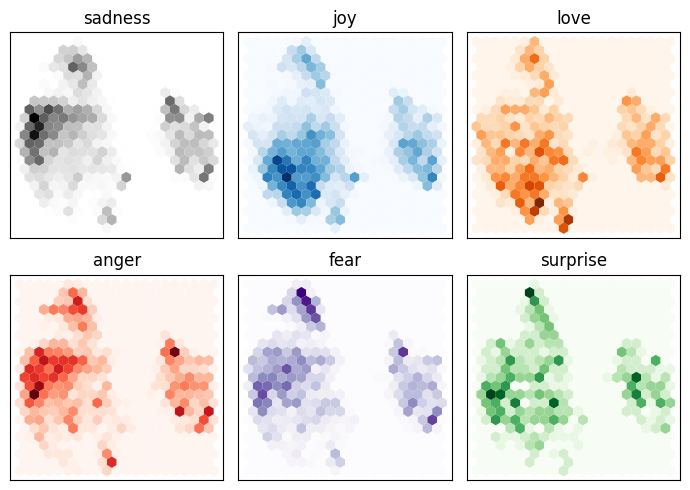

In [62]:
# 시각화
fig, axes = plt.subplots(2, 3, figsize=(7, 5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions['train'].features['label'].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [63]:
# 간단한 분류 모델 훈련하기

from sklearn.linear_model import LogisticRegression

# 수렴을 보장하기 위해 max_iter를 증가
lr_crf = LogisticRegression(max_iter=3000)
lr_crf.fit(X_train, y_train)
lr_crf.score(X_valid, y_valid)

0.634

In [64]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

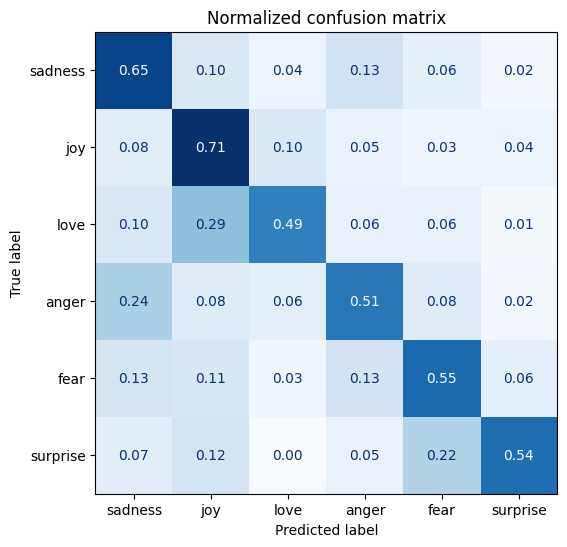

In [65]:
# 오차 행렬

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_preds, y_true, normalize='true')
  fig, ax = plt.subplots(figsize=(6,6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap='Blues', values_format='.2f', ax=ax, colorbar=False)
  plt.title('Normalized confusion matrix')
  plt.show()

y_preds = lr_crf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

In [66]:
# 2.3.2 트랜스포머 미세 튜닝하기

# 사전 훈련된 모델 로드

from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [67]:
# 성공 지표 정의

from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average='weighted')
  acc = accuracy_score(labels, preds)
  return {'accuracy': acc, 'f1': f1}

In [68]:
# 모델 훈련

from huggingface_hub import notebook_login

notebook_login()

In [69]:
#!pip install accelerate -U

In [70]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  save_strategy="epoch",
                                  load_best_model_at_end=True,
                                  log_level="error")

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [72]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.853600,0.325714,0.900000,0.899397
2,0.250100,0.224590,0.923500,0.923640


In [75]:
preds_output = trainer.predict(emotions_encoded["validation"])

In [76]:
preds_output.metrics

{'test_loss': 0.22459042072296143,
 'test_accuracy': 0.9235,
 'test_f1': 0.9236396503566779,
 'test_runtime': 4.0043,
 'test_samples_per_second': 499.457,
 'test_steps_per_second': 7.991}

In [77]:
# 각 클래스별 예측 데이터
y_preds = np.argmax(preds_output.predictions, axis=-1)

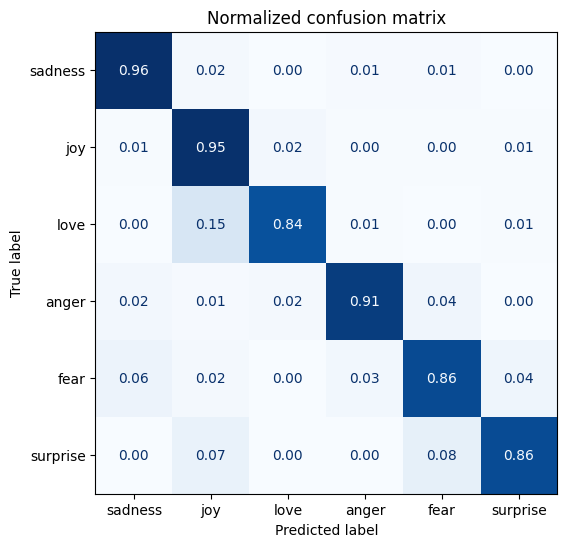

In [78]:
# 오차행렬
plot_confusion_matrix(y_preds, y_valid, labels)

In [83]:
# 오류분석
# 모델의 loss값기준으로 샘플 정렬

from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # 모든 입력 텐서를 모델과 같은 장치로 이동합니다.
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device),
                             reduction="none")

    # 다른 데이터셋 열과 호환되도록 출력을 CPU로 옮깁니다.
    return {"loss": loss.cpu().numpy(),
            "predicted_label": pred_label.cpu().numpy()}

In [84]:
# 데이터셋을 다시 파이토치 텐서로 변환합니다.
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])
# 손실 값을 계산합니다.
emotions_encoded["validation"] = emotions_encoded["validation"].map(
    forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [85]:
# 텍스트, 손실, 예측 레이블과 진짜 레이블로 DF 생성

emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(label_int2str))

In [86]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
882,i feel badly about reneging on my commitment t...,love,sadness,5.850348
1801,i feel that he was being overshadowed by the s...,love,sadness,5.739264
1950,i as representative of everything thats wrong ...,surprise,sadness,5.699184
405,i have been feeling extraordinarily indecisive...,fear,joy,5.370650
465,i would eventually go in to these stores but i...,joy,fear,5.321012
765,i feel super awkward and out of place right now,joy,sadness,5.207847
1274,i am going to several holiday parties and i ca...,joy,sadness,5.170640
1963,i called myself pro life and voted for perry w...,joy,sadness,5.101205
1870,i guess i feel betrayed because i admired him ...,joy,sadness,5.067744
1500,i guess we would naturally feel a sense of lon...,anger,sadness,4.839675


In [87]:
df_test.sort_values("loss", ascending=True).head(10)

,text,label,predicted_label,loss
1147,i type i feel bouncy and excited to get out my...,joy,joy,0.017200
1263,i feel this way about blake lively,joy,joy,0.017396
131,i feel like a graph doesnt show the data accur...,joy,joy,0.017545
632,i feel he is an terrific really worth bet,joy,joy,0.017708
1873,i feel practically virtuous this month i have ...,joy,joy,0.017906
11,i was dribbling on mums coffee table looking o...,joy,joy,0.017980
173,i expected to feel more but nope i dont and th...,joy,joy,0.018121
1090,i dont know what it is about me and sweets the...,joy,joy,0.018155
212,i own the brushes are constantly used and i fe...,joy,joy,0.018253
456,im feeling rather festive here in south florida,joy,joy,0.018257


In [88]:
# 모델 저장 및 공유
trainer.push_to_hub(commit_message="Training completed!")

CommitInfo(commit_url='https://huggingface.co/hun0520/distilbert-base-uncased-finetuned-emotion/commit/821db8b4a010ef0d2e2cadaa3952b2da2587c690', commit_message='Training completed!', commit_description='', oid='821db8b4a010ef0d2e2cadaa3952b2da2587c690', pr_url=None, pr_revision=None, pr_num=None)

In [89]:
# 파인 튜닝된 모델 로드

from transformers import pipeline

model_id = 'hun0520/distilbert-base-uncased-finetuned-emotion'
classifier = pipeline("text-classification", model=model_id)

config.json:   0%|          | 0.00/883 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [91]:
# 추론
custom_tweet = "I asw a video in Netflex and it was amazing"
preds = classifier(custom_tweet, top_k=None)

In [92]:
preds_sorted = sorted(preds, key=lambda d: d['label'])
preds_df = pd.DataFrame(preds_sorted)
preds_df

,label,score
0,LABEL_0,0.013806
1,LABEL_1,0.219868
2,LABEL_2,0.039324
3,LABEL_3,0.023118
4,LABEL_4,0.047807
5,LABEL_5,0.656077


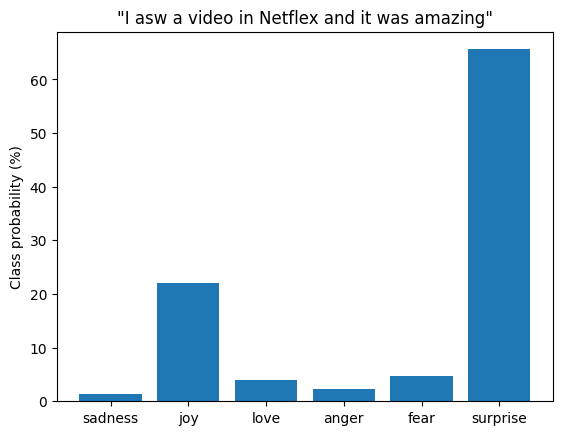

In [93]:
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()